In [1]:
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import napari

In [3]:
os.listdir("SegFormer3D-main/data/uls2023_seg/ULS2023_Training_Data/")

['Dataset001_MIX']

# Loading image with Simple STK

In [5]:
im = sitk.ReadImage("SegFormer3D-main/data/uls2023_seg/uls2023_raw_data/train/imagesTr/MIX_00000_0000.nii.gz")

In [6]:
im_np = sitk.GetArrayFromImage(im)
im_np.shape

(64, 128, 128)

# Loading Image with Nibabel

In [9]:
import nibabel as nib
nib_im = nib.load("SegFormer3D-main/data/uls2023_seg/uls2023_raw_data/train/imagesTr/MIX_00000_0000.nii.gz")
nib_im.shape

(128, 128, 64, 1)

In [8]:
nib_lbl = nib.load("SegFormer3D-main/data/uls2023_seg/uls2023_raw_data/train/labelsTr/MIX_00000.nii.gz")
nib_lbl.shape

(128, 128, 64, 1)

# Visualizing Image

{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1f241c1f650>,
 (0, 0, 127): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1f23a81df50>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1f242214c50>,
 (0, 1, 127): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1f242216010>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1f242217290>,
 (0, 2, 127): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1f2422186d0>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1f242219b50>,
 (0, 3, 127): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1f24221ad90>,
 (0, 4, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1f24221c110>,
 (0, 4, 127): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1f24221d390>,
 (0, 5, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1f24221e6d0>,
 (0, 5, 127): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1f24221f910>,
 (0, 6, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1f242224b10>,


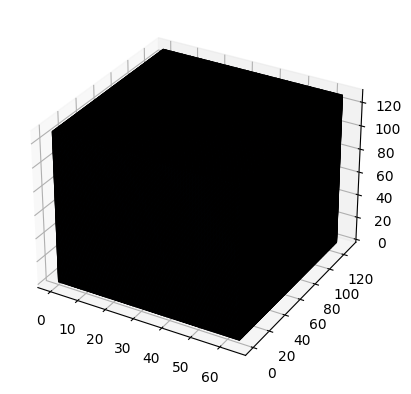

In [12]:
im_np = sitk.GetArrayFromImage(im)
im_np.shape
ax = plt.axes(projection='3d')
ax.voxels(im_np[:, :, :], edgecolor='k')

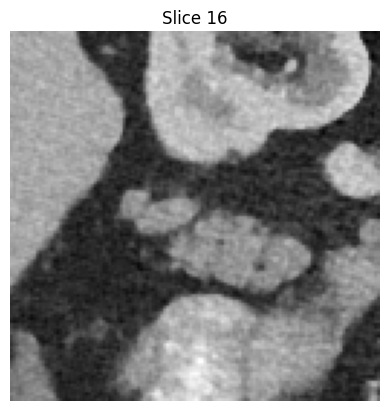

In [17]:
# im_np is your 3D numpy array
slice_index = 16
plt.imshow(im_np[slice_index, :, :], cmap='gray')
plt.title(f"Slice {slice_index}")
plt.axis('off')
plt.show()

# Testing Pre-processing

In [2]:
import torch

In [4]:
labels = torch.load("../../../data/uls2023_seg/ULS2023_Training_Data/MIX_00000/MIX_00000_label.pt")

In [5]:
im = torch.load("../../../data/uls2023_seg/ULS2023_Training_Data/MIX_00000/MIX_00000_im.pt")

In [5]:
im.shape

(1, 64, 128, 128)

In [7]:
import sys
sys.path.append("../../../")
from dataloaders.uls2023_seg import ULS2023Dataset
from augmentations.augmentations import build_augmentations


In [9]:
dataset = ULS2023Dataset(
    root_dir="../../../data/uls2023_seg/",
    is_train=True,
    transform=build_augmentations(True),
)

In [10]:
dataset.__len__()  # 1000 images in the dataset

4907

In [12]:
dataset.__getitem__(0)['image'].shape

torch.Size([1, 64, 128, 128])

In [15]:
dataset[0]

FileNotFoundError: [Errno 2] No such file or directory: '../../../data/uls2023_seg/ULS2023_Training_Data/MIX_02616\\MIX_02616_im.pt'